## Utilizing Reddit API!

In [1]:
!pip install praw

## First collecting Schizophrenic patient data

In [2]:
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id="EgYhtuW9L0CD3LBIgvkvrw",
    client_secret="BeUvMfWktpPrGVQK5myrTaw8scgnLA",
    user_agent="Schiz/suicide correlation by /u/NecessaryClassic4135"
)

usernames = ["sunfloras", "No-Molasses-2247", 'Repulsive_Ring_2309', 'helsdog', 'Mental_Draft_', "Icy-Artichoke3305", "-Baguette_", "Basil-the-bagel", "RenivaMa", "aloafaloft", "vacantxwhxre", "x37h4n", "venomang", "Rude-Ad-8051", "drowsyneon", "Independent_Pain3944", "MuchAd8491", "Great-FOXX", "PsychieLeaks", "booshweasel", "pringusdingus6600", "Rude_Economist9099", "InterestingKiwi5004", "axil8888", "Low-Tailor-4062", "ToughLuckLukeLuke", "kirs1132", "latudalithium", "logscaledtree", "trashaccountturd", "blahblahlucas", "schizofuqface", "Arbitrary-Signal", "Outside-Age5073", "arpanetas", "ResurgentClusterfuck", "Roxanngreen83", "Rebephrenic_", "NegativeEngine", "Cute-Avali", "Successful_Room_3576", "Oosteocyte", "sas0002", "BitersAnon", "darkfireice", "deamon83", "Warm-Inflation-5734", "Jaye-Fern", "cosmiccatface", "trashaccountturd"]

data = []
for username in usernames:
    # Get reddit user as object
    user = reddit.redditor(username)
    
    # get their top 20 posts (most recent)
    submissions = user.submissions.new(limit=20)
    
    # loop through and append the data
    for submission in submissions:
        data.append({
            "Username": username,
            "Post Text": submission.selftext
        })

/var/folders/5m/g0pwzccs05jgcs3_6yxf94p00000gp/T/ipykernel_12348/81160205.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# convert dictionaries into a dataframe
study = pd.DataFrame(data)
study['Diagnosis'] = "SCH"
study

,Username,Post Text,Diagnosis
0,sunfloras,when i meet new people i’m really scared that ...,SCH
1,sunfloras,my anxiety and sometimes psychosis acts up rea...,SCH
2,sunfloras,i was having an episode where i thought no one...,SCH
3,sunfloras,"i’ve tried 6mg risperidone, 10mg abilify, and ...",SCH
4,sunfloras,"are there any meds stronger than abilify, risp...",SCH
...,...,...,...
779,trashaccountturd,"Ok, so I’ve been doing research on which flywh...",SCH
780,trashaccountturd,"So, the best working theory I have is that an ...",SCH
781,trashaccountturd,"A credit card was stuck, causing the cup holde...",SCH
782,trashaccountturd,"This is the only spots like this on the tire, ...",SCH


## Second, collecting mental health users

In [4]:
from prawcore.exceptions import NotFound

reddit = praw.Reddit(
    client_id="EgYhtuW9L0CD3LBIgvkvrw",
    client_secret="BeUvMfWktpPrGVQK5myrTaw8scgnLA",
    user_agent="Schiz/suicide correlation by /u/NecessaryClassic4135"
)

usernames = ["UtopianPariah", "iloveredditrabbit", "LisKoz1989", "joeym412", "SillyDot3305", "J3rk_d5", "HauntingWeather3289", "Darkahrii", "GlitterCoconut", "CarSubstantial5238", "angelpawsz", "BottleOfFlesh", "goldenhobisediting", "Keny376", "Strict-Impression650", "eaglesfan700", "Crowgogh", "Snoo-48989", "OkFrame3668", "Personal_Slide_9421", "Hellmos_thorax", "0nce_A", "wadiostar", "initialpanik", "justarandomer_", "MoonlitShadow4416", "CHARILEwolf", "ImpeccableSloth33", "vulturesboy", "MathematicianFit1992", "Battlespot9999", "Subject_Low5199", "FriendlyStatus8165", "DryInvestment1906", "Creative-Store", "livvyloo94", "Reasonable_Eye_8072", "AcceptableSmoke9129", "MatikAX", "hypnoghoul", "i1xyz", "I_Forget_Stuff", "ASleepyB0i", "Careless-Scratch-658", "MelodiousDew", "AcediaIra", "Djurdjen", "Lou_Inc", "Ajackxe", "Guilty_Critic"]
             
mhdata = []

for username in usernames:
    try:
        user = reddit.redditor(username)
        
        _ = user.name
        
        submissions = user.submissions.new(limit=20)
        
        for submission in submissions:
            mhdata.append({
                "Username": username,
                "Post Text": submission.selftext
            })
    
    except NotFound:
        print(f"User {username} not found, skipping.")
    except Exception as e:
        print(f"An error occurred for user {username}: {e}")

User DryInvestment1906 not found, skipping.


In [6]:
mentalhealth = pd.DataFrame(mhdata)
mentalhealth['Diagnosis'] = "MH"
mentalhealth

,Username,Post Text,Diagnosis
0,UtopianPariah,"I'm 23, just came to New Jersey 3 months ago, ...",MH
1,UtopianPariah,"Anyone willing to be friends can text me, I'm ...",MH
2,UtopianPariah,"after finishing elden ring, I bought sekiro in...",MH
3,UtopianPariah,"so, all my friends have either drifted apart o...",MH
4,UtopianPariah,Please DM if interested to have a conversation.,MH
...,...,...,...
703,Guilty_Critic,"Hello, I have a true phobia of fish. I believe...",MH
704,Guilty_Critic,So I have a new neighbor and their dog barks a...,MH
705,Guilty_Critic,My apartment has a door that cannot be opened ...,MH
706,Guilty_Critic,I’m not sure if it’s something i need to get l...,MH


## Lastly, with neither diagnosis

In [7]:
from prawcore.exceptions import NotFound

reddit = praw.Reddit(
    client_id="EgYhtuW9L0CD3LBIgvkvrw",
    client_secret="BeUvMfWktpPrGVQK5myrTaw8scgnLA",
    user_agent="Schiz/suicide correlation by /u/NecessaryClassic4135"
)

usernames = ["youre-welcome5557777", "maybesaydie", "Current_Variety_9577", "MileHighMontana", "Tasty_Ad_4082", "Solo-is-simpler", "-Moshe-", "spayne1111", "These_Quit_1692", "GendoIkari_82", "MistWeaver80", "AceCombat9519", "CaterpillarReady2709", "Asia_Correal", "Formal-Public-2652", "Certain-Ad-7578", "geekydreams", "Collt092", "winthropx", "DarkTwistedFantasee", "scotthallstandup", "Many-Ad-2154", "StabbesandSlash", "Sea_Swimmer_3179", "ben-costello", "CupcakeNatasha", "crackerzak", "Wide-Refuse-7815", "blimeyitsme", "fabry-sans", "Nym-ph", "Owen_D_Young", "Gamora3728", "Kyosji", "ae23ctm", "wjzwah3d", "kylorenismydad", "littleblackcar", "socalquest", "Chemical-Engineer979", "Subreddit-Guy", "Catmoonie", "KeyDonut2156", "DlGlTAL_IDENTlTY", "Large_Seesaw_232", "danman8001", "Real-Status-1414", "numbuhonestunnuh", "SignificantPea8021", "Natural-Brilliant-95"]
             
nonedata = []

for username in usernames:
    try:
        user = reddit.redditor(username)
        
        _ = user.name
        
        submissions = user.submissions.new(limit=20)
        
        for submission in submissions:
            nonedata.append({
                "Username": username,
                "Post Text": submission.selftext
            })
    
    except NotFound:
        print(f"User {username} not found, skipping.")
    except Exception as e:
        print(f"An error occurred for user {username}: {e}")


User Wide-Refuse-7815 not found, skipping.


In [8]:
none = pd.DataFrame(nonedata)
none['Diagnosis'] = "Neither"
none

,Username,Post Text,Diagnosis
0,youre-welcome5557777,I’ve heard that the O’s fanbase used to stretc...,Neither
1,youre-welcome5557777,,Neither
2,youre-welcome5557777,,Neither
3,youre-welcome5557777,,Neither
4,youre-welcome5557777,,Neither
...,...,...,...
820,Natural-Brilliant-95,Hey everyone just a couple of questions 1st if...,Neither
821,Natural-Brilliant-95,Hi everyone I have a player who wants to use m...,Neither
822,Natural-Brilliant-95,Hi I am wondering if its possible to randomize...,Neither
823,Natural-Brilliant-95,Hi all I am making my second ever cleric and I...,Neither


## Combining all of my data

In [9]:
import pandas as pd
all_posts = pd.concat([study, mentalhealth, none])
all_posts

,Username,Post Text,Diagnosis
0,sunfloras,when i meet new people i’m really scared that ...,SCH
1,sunfloras,my anxiety and sometimes psychosis acts up rea...,SCH
2,sunfloras,i was having an episode where i thought no one...,SCH
3,sunfloras,"i’ve tried 6mg risperidone, 10mg abilify, and ...",SCH
4,sunfloras,"are there any meds stronger than abilify, risp...",SCH
...,...,...,...
820,Natural-Brilliant-95,Hey everyone just a couple of questions 1st if...,Neither
821,Natural-Brilliant-95,Hi everyone I have a player who wants to use m...,Neither
822,Natural-Brilliant-95,Hi I am wondering if its possible to randomize...,Neither
823,Natural-Brilliant-95,Hi all I am making my second ever cleric and I...,Neither


In [30]:
all_posts.to_csv("all_posts.csv", index=False)

## Creating the training data set

In [10]:
reddit = praw.Reddit(
    client_id="EgYhtuW9L0CD3LBIgvkvrw",
    client_secret="BeUvMfWktpPrGVQK5myrTaw8scgnLA",
    user_agent="Schiz/suicide correlation by /u/NecessaryClassic4135"
)

subreddit = reddit.subreddit("SuicideWatch")

posts = []
for submission in subreddit.new(limit=None):
    title = submission.title
    text = submission.selftext
    combined_text = f"{title}. {text}"
    posts.append({
        "combined_text": combined_text,
        "is_suicidal": True  # Manually label as suicidal
    })

In [32]:
suicide = pd.DataFrame(posts)
suicide.to_csv("suicide_data.csv", index=False)

In [11]:
import random
reddit = praw.Reddit(
    client_id="EgYhtuW9L0CD3LBIgvkvrw",
    client_secret="BeUvMfWktpPrGVQK5myrTaw8scgnLA",
    user_agent="Schiz/suicide correlation by /u/NecessaryClassic4135"
)

subreddit_names = ["Coachella", "assassinscreed", "audiobooks", "aviation", "budgetfood"]

post_texts = []

for subreddit_name in subreddit_names:
    # get 4 random posts
    subreddit = reddit.subreddit(subreddit_name)
    random_submissions = random.sample(list(subreddit.new(limit=5)), 5)
    
    for submission in random_submissions:
        post_texts.append(submission.selftext)

In [35]:
nonsuicide = pd.DataFrame(post_texts)
nonsuicide.to_csv("nonsuicide_data.csv", index=False)

**I went through and took the top responses. I then self-identified whether they were suicidal text or not.**

In [12]:
training_data = pd.read_csv('data_test.csv')
training_data

,compiled_text,is_suicidal
0,"I’ll be there Friday, leave Tuesday and I will...",False
1,Wishlist item. Again.,False
2,I know most people would rather see them make ...,False
3,Just got the game and put in about four hours ...,False
4,Honestly I'm hoping for a Japanese dub. Some g...,False
5,I completed every AC games and stopped after U...,False
6,Been playing ac 4 again recently and am really...,False
7,Why are American based books read by people wi...,False
8,So it's the Arabian Nights based on an 1811 tr...,False
9,Hello! Thank you for clicking in!\n\nI am a wr...,False


## Training + Testing Model!

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = training_data['compiled_text']
y = training_data['is_suicidal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

all_posts_vec = vectorizer.transform(all_posts['Post Text'])
all_posts['predicted_is_suicidal'] = model.predict(all_posts_vec)

print(all_posts)

              precision    recall  f1-score   support

       False       0.75      1.00      0.86         3
        True       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

                 Username                                          Post Text  \
0               sunfloras  when i meet new people i’m really scared that ...   
1               sunfloras  my anxiety and sometimes psychosis acts up rea...   
2               sunfloras  i was having an episode where i thought no one...   
3               sunfloras  i’ve tried 6mg risperidone, 10mg abilify, and ...   
4               sunfloras  are there any meds stronger than abilify, risp...   
..                    ...                                                ...   
820  Natural-Brilliant-95  Hey everyone just a couple of questions 1st if...   
821  Natural-Brilliant-95  Hi eve

In [15]:
all_posts.head(2)

,Username,Post Text,Diagnosis,predicted_is_suicidal
0,sunfloras,when i meet new people i’m really scared that ...,SCH,False
1,sunfloras,my anxiety and sometimes psychosis acts up rea...,SCH,True


In [16]:
all_posts.to_csv("final_predict.csv", index=False)

# Analysis!

In [34]:
pd.set_option('display.max_colwidth', None)
all_posts.iloc[745]

Username                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Jaye-Fern
Post Text                I went to a networking event and rather than just go there and leave I stayed the whole time and got a bunch of contacts! I even went to an old haunt of mine after to hang out with likeminded folks that I didn’t know! I’m not sure if this is all Rexulti or it’s summer or it’s just a good

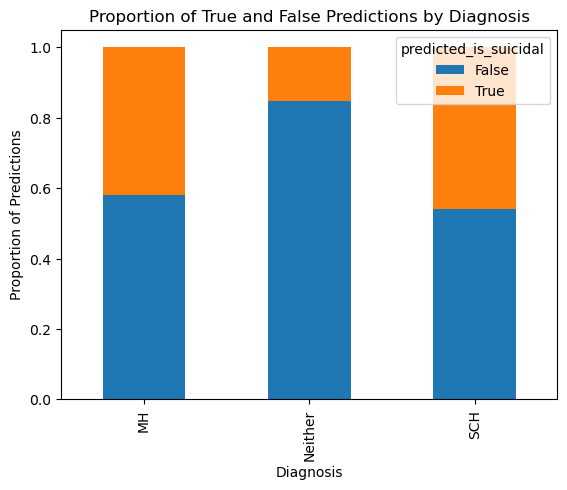

In [54]:
import matplotlib.pyplot as plt

counts_df = all_posts.groupby(['Diagnosis', 'predicted_is_suicidal']).size().unstack(fill_value=0)
proportions_df = counts_df.div(counts_df.sum(axis=1), axis=0)
proportions_df.plot(kind='bar', stacked=True)

plt.xlabel('Diagnosis')
plt.ylabel('Proportion of Predictions')
plt.title('Proportion of True and False Predictions by Diagnosis')

plt.show()

In [95]:
proportions_df

predicted_is_suicidal,False,True
Diagnosis,,
MH,0.581921,0.418079
Neither,0.846715,0.153285
SCH,0.541401,0.458599


In [55]:
grouped_df = all_posts.groupby(['Username', 'Diagnosis'])
at_least_one_suicidal = grouped_df['predicted_is_suicidal'].any().groupby('Diagnosis').sum()

total_users = grouped_df['Username'].nunique().groupby('Diagnosis').sum()

proportion_suicidal_users = at_least_one_suicidal / total_users

print(proportion_suicidal_users)

Diagnosis
MH         0.957447
Neither    0.530612
SCH        0.895833
dtype: float64


In [56]:
def count_suicide_mentions(posts):
    return sum(('suicide' in post) or ('suicidal' in post) for post in posts)

grouped = all_posts.groupby(['Username', 'Diagnosis'])['Post Text'].apply(count_suicide_mentions).reset_index(name='suicide_mentions')

users_with_suicide_mentions = grouped[grouped['suicide_mentions'] > 0]

users_with_suicide_mentions

,Username,Diagnosis,suicide_mentions
3,ASleepyB0i,MH,1
4,AcceptableSmoke9129,MH,1
10,Basil-the-bagel,SCH,1
12,BitersAnon,SCH,1
16,Careless-Scratch-658,MH,1
26,Cute-Avali,SCH,1
37,Guilty_Critic,MH,1
43,InterestingKiwi5004,SCH,1
59,MistWeaver80,Neither,1
64,No-Molasses-2247,SCH,1


In [93]:
# Did my model think this text from MistWeaver80 was suicidal?

try:
    all_posts[(all_posts.predicted_is_suicidal == True) and (all_posts.Username == "MistWeaver80")]
except Exception as e:
    print("No predictions of suicidal text from this user")

No predictions of suicidal text from this user


In [92]:
# It seems like this was not necessarily suicidal text...

all_posts[all_posts.Username == "MistWeaver80"].head(1)

,Username,Post Text,Diagnosis,predicted_is_suicidal
183,MistWeaver80,Link to the article: https://www.telegraph.co.uk/global-health/women-and-girls/kurdistan-iraq-suicide-self-immolation-domestic-violence/,Neither,False


In [61]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(all_posts['Diagnosis'] == 'SCH', all_posts['predicted_is_suicidal'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant association between schizophrenia diagnosis and suicidal text (p < 0.05).")
else:
    print("There is no significant association between schizophrenia diagnosis and suicidal text (p >= 0.05).")

Contingency Table:
predicted_is_suicidal  False  True 
Diagnosis                          
False                   1108    422
True                     425    360

Chi2 Statistic: 76.67201765213719
P-value: 2.018431476549952e-18
There is a significant association between schizophrenia diagnosis and suicidal text (p < 0.05).


In [97]:
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

new_posts = all_posts.copy()

new_posts['predicted_is_suicidal'] = new_posts['predicted_is_suicidal'].astype(int)

expected_categories = ['MH', 'SCH', 'Neither']

new_posts = pd.get_dummies(new_posts, columns=['Diagnosis'], prefix='Diagnosis')
for category in expected_categories:
    column_name = f'Diagnosis_{category}'
    if column_name not in new_posts.columns:
        new_posts[column_name] = 0


contingency_table = pd.crosstab(new_posts['Diagnosis_SCH'], new_posts['predicted_is_suicidal'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

X = new_posts[['Diagnosis_MH', 'Diagnosis_Neither', 'Diagnosis_SCH']]
y = new_posts['predicted_is_suicidal']

model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')


Cramér's V: 0.18198808217231985
R-squared: 0.08461516541704761
